In [41]:
import pandas as pd
import re
import pickle
import nltk
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:

# Download required NLP resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAJESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAJESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\RAJESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAJESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:

# Load dataset
dataset_path = "../datasets/new_dataset.csv"
df = pd.read_csv(dataset_path)

# Remove NaN values
df.dropna(subset=["Description of the Issue", "Type of Complaint"], inplace=True)

In [54]:
# Encode complaint categories
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(df["Type of Complaint"])

In [55]:

# Initialize NLP tools
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [56]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase conversion
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization & Stopword removal
    return " ".join(words)


In [57]:
# Apply preprocessing
X = df["Description of the Issue"].apply(preprocess_text)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [58]:

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    max_features=7000, ngram_range=(1, 2), sublinear_tf=True, stop_words="english"
)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Training Logistic Regression...
Logistic Regression Accuracy: 0.8836 | Training Time: 0.03 seconds
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       112
           1       0.92      0.90      0.91       108
           2       0.90      0.89      0.90       132
           3       0.89      0.80      0.84       108
           4       0.87      0.91      0.89       124

    accuracy                           0.88       584
   macro avg       0.88      0.88      0.88       584
weighted avg       0.88      0.88      0.88       584



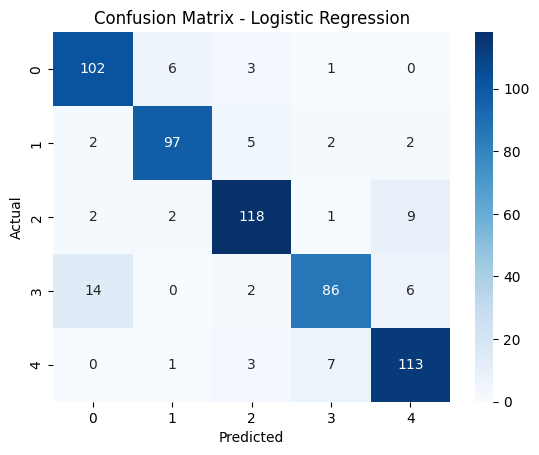

Cross-validation scores for Logistic Regression: [0.84246575 0.87842466 0.89554795 0.92465753 0.86620926]
Mean CV accuracy for Logistic Regression: 0.8814610305693271
Training Random Forest...
Random Forest Accuracy: 0.8767 | Training Time: 2.13 seconds
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       112
           1       0.88      0.92      0.90       108
           2       0.91      0.92      0.92       132
           3       0.86      0.74      0.80       108
           4       0.87      0.90      0.88       124

    accuracy                           0.88       584
   macro avg       0.88      0.87      0.87       584
weighted avg       0.88      0.88      0.88       584



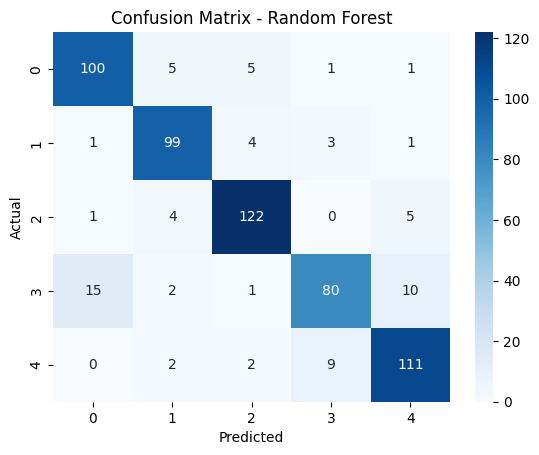

Cross-validation scores for Random Forest: [0.81335616 0.82876712 0.86643836 0.91438356 0.84219554]
Mean CV accuracy for Random Forest: 0.8530281491576399
Training SVM...
SVM Accuracy: 0.8973 | Training Time: 0.67 seconds
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       112
           1       0.92      0.91      0.91       108
           2       0.90      0.92      0.91       132
           3       0.89      0.81      0.85       108
           4       0.90      0.91      0.90       124

    accuracy                           0.90       584
   macro avg       0.90      0.90      0.90       584
weighted avg       0.90      0.90      0.90       584



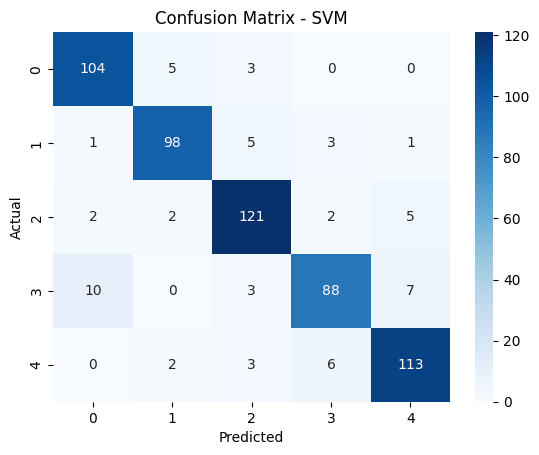

Cross-validation scores for SVM: [0.84246575 0.8989726  0.8989726  0.93664384 0.86963979]
Mean CV accuracy for SVM: 0.8893389177377287
Training Naive Bayes...
Naive Bayes Accuracy: 0.8887 | Training Time: 0.00 seconds
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       112
           1       0.92      0.91      0.91       108
           2       0.88      0.91      0.90       132
           3       0.91      0.78      0.84       108
           4       0.88      0.90      0.89       124

    accuracy                           0.89       584
   macro avg       0.89      0.89      0.89       584
weighted avg       0.89      0.89      0.89       584



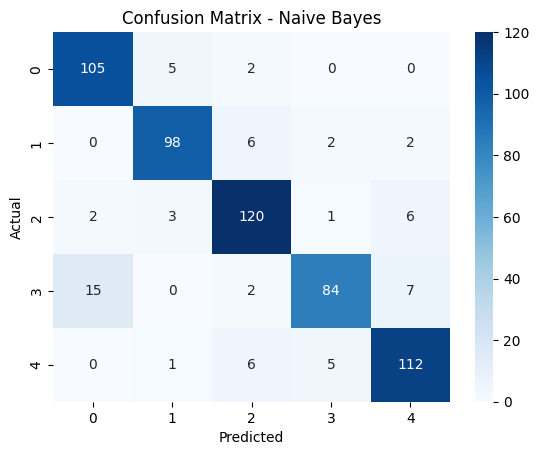

Cross-validation scores for Naive Bayes: [0.84589041 0.88356164 0.90753425 0.93321918 0.86792453]
Mean CV accuracy for Naive Bayes: 0.8876260015507883
Training KNN...
KNN Accuracy: 0.8613 | Training Time: 0.02 seconds
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       112
           1       0.89      0.86      0.88       108
           2       0.85      0.89      0.87       132
           3       0.85      0.78      0.81       108
           4       0.90      0.84      0.87       124

    accuracy                           0.86       584
   macro avg       0.86      0.86      0.86       584
weighted avg       0.86      0.86      0.86       584



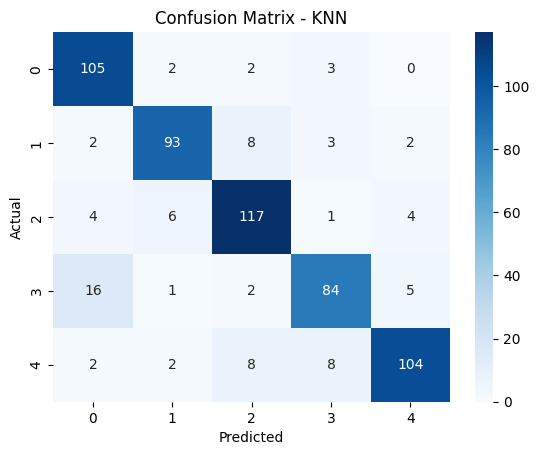

Cross-validation scores for KNN: [0.79109589 0.82363014 0.85273973 0.85787671 0.81132075]
Mean CV accuracy for KNN: 0.8273326440940811
Training Decision Tree...
Decision Tree Accuracy: 0.7740 | Training Time: 0.16 seconds
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.81      0.71      0.75       112
           1       0.75      0.85      0.80       108
           2       0.81      0.77      0.79       132
           3       0.68      0.72      0.70       108
           4       0.82      0.82      0.82       124

    accuracy                           0.77       584
   macro avg       0.77      0.77      0.77       584
weighted avg       0.78      0.77      0.77       584



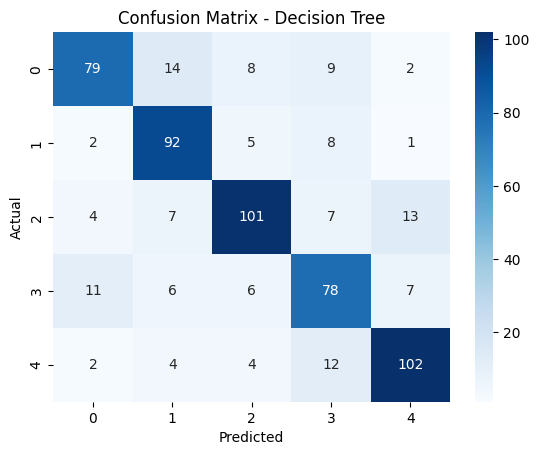

Cross-validation scores for Decision Tree: [0.72260274 0.74486301 0.76369863 0.82705479 0.72555746]
Mean CV accuracy for Decision Tree: 0.756755327897742


In [61]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(solver="liblinear", C=1.0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", C=1.0),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train & Evaluate models
best_model = None
best_accuracy = 0
model_performance = {}
    
for model_name, model in models.items():
    print(f"Training {model_name}...")
    start_time = time.time()
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    end_time = time.time()
    
    model_performance[model_name] = {
        "accuracy": accuracy,
        "training_time": end_time - start_time
    }
    
    print(f"{model_name} Accuracy: {accuracy:.4f} | Training Time: {end_time - start_time:.2f} seconds")  
    
    # Save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        
    # Classification report
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Cross-validation scores
    X_all_vec = tfidf_vectorizer.transform(X)  # Use full dataset vectorized
    cv_scores = cross_val_score(model, X_all_vec, y, cv=5)
    print(f"Cross-validation scores for {model_name}: {cv_scores}")
    print(f"Mean CV accuracy for {model_name}: {cv_scores.mean()}")

In [62]:
# Save the best-performing model
with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

print("\n✅ Model training complete! Best model saved.")
print(f"🏆 Best Model: {best_model} with Accuracy: {best_accuracy:.4f}")

# Print all model performances
print("\n🔍 Model Performance Summary:")
for model_name, metrics in model_performance.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']:.4f}, Training Time = {metrics['training_time']:.2f} sec")



✅ Model training complete! Best model saved.
🏆 Best Model: SVC(kernel='linear') with Accuracy: 0.8973

🔍 Model Performance Summary:
Logistic Regression: Accuracy = 0.8836, Training Time = 0.03 sec
Random Forest: Accuracy = 0.8767, Training Time = 2.13 sec
SVM: Accuracy = 0.8973, Training Time = 0.67 sec
Naive Bayes: Accuracy = 0.8887, Training Time = 0.00 sec
KNN: Accuracy = 0.8613, Training Time = 0.02 sec
Decision Tree: Accuracy = 0.7740, Training Time = 0.16 sec
